# Kmeans Clustering Algorithm

- Ref: 1033

In [27]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings as wr
wr.filterwarnings('ignore')

In [28]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Michel,27,70000
1,Pitter,29,90000
2,John,29,61000
3,Kitty,28,60000
4,Nelson,42,150000


In [29]:
df_1 = df.copy()
df_2 = df.copy()

In [30]:
df.shape

(22, 3)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


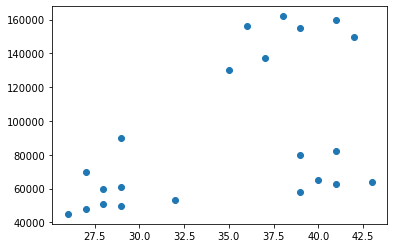

In [32]:
plt.scatter(df['Age'], df['Income($)']) # Visully 3 Clusters
plt.show()

# Step 1

In [33]:
km = KMeans(n_clusters=3)
km                        # Object creation

KMeans(n_clusters=3)

# Step 2 - Fit & Predict

- I will fit & predict the datafram excluding name col, it will not useful for this numerical computation
- After fit & predict you will get back Y_predicted
- Fit & Predit by created "Object"
- y_predicted : will show data point to its belonging clusters (as k=3 defined, all datapoints must be assiged by this 3 (0,1,2)

In [34]:
# Step 2: Fit & Predict
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted                       

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [35]:
# Visualize the predicted result in seperate col
df['cluster'] = y_predicted            # its still not as good as scatter  plot
df.head()

,Name,Age,Income($),cluster
0,Michel,27,70000,2
1,Pitter,29,90000,2
2,John,29,61000,1
3,Kitty,28,60000,1
4,Nelson,42,150000,0


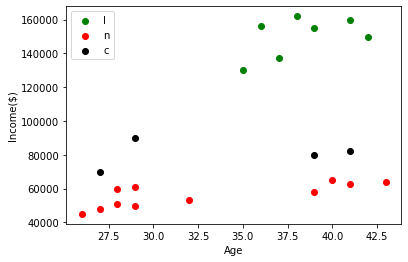

In [36]:
# Seperate Data Frame
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Scatter plot for better visualization
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

# Labels
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend('Income($)')
plt.show()

### Graph Findings

- By the above graph it founds that, RED Cluster is OK, but Black Cluster having some others data poins e.g Green
- Why this problem happens ? Ans: Because  of scaling problem, our data is not scaled properly before traing
- Y-Axis : range from (40 - 160K) while X-Axis: Still pretty narrow (27 to 42) very dissimilar/ unsual range between axis
- So, when you dont scaled your features properly, you may get such kind of problem, that why need some preprocessing (Scaling)
- MinMaxScaler: it will try to scale make the range (0,1)

# Feature Transformation

In [37]:
# Transform Income
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']]) # Now income is scaled (0,1)
df.head()

# Transform Age
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])             # Age has been scaled
df.head()


,Name,Age,Income($),cluster
0,Michel,0.058824,0.213675,2
1,Pitter,0.176471,0.384615,2
2,John,0.176471,0.136752,1
3,Kitty,0.117647,0.128205,1
4,Nelson,0.941176,0.897436,0


# Step 3: Train model with scaled data

In [38]:
# Train Model
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])  # Train the model with scaled data
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [40]:
df['Cluster2'] = y_predicted  # Cluster 2 add
df.drop('cluster',axis='columns', inplace=True)  # Previous Cluster Dropped, now can go for scatter plot for better visualzation after scaled
df.head()

,Name,Age,Income($),Cluster2
0,Michel,0.058824,0.213675,1
1,Pitter,0.176471,0.384615,1
2,John,0.176471,0.136752,1
3,Kitty,0.117647,0.128205,1
4,Nelson,0.941176,0.897436,2


In [49]:
km.cluster_centers_   # (value for x & y, e.g Age, Income)- 3 rows for 3 cluster, 1 row = 1st cluster, 2nd row = 2nd Cluster, 3rd row = 3rd Cluster

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

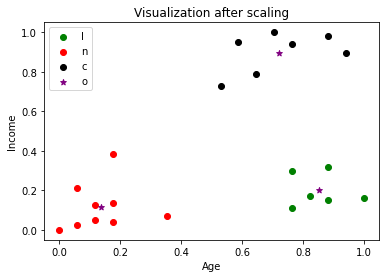

In [50]:
df1 = df[df.Cluster2==0]
df2 = df[df.Cluster2==1]
df3 = df[df.Cluster2==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid') # Centroid Visualizatoin


plt.title('Visualization after scaling')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend('Income($)')
plt.show()

- plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1]) :  [:,0] all the rows, 0 (1st col) [:,1] all the rows, 1 (2nd col)

# Elbow Technique

In [58]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.17462386586687895,
 0.13706529523670868,
 0.10497488680620909]

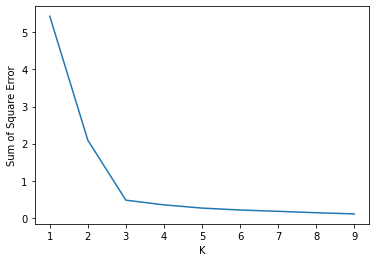

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, sse)
plt.show()